In [19]:
import pandas as pd
import numpy as np
import matplotlib as m
import seaborn as sns
import datetime as dt

In [4]:
PrisonData = pd.read_csv("Data/Iowa_Prison_Admissions.csv")

In [21]:
PrisonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48057 entries, 0 to 48056
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Record ID                48057 non-null  int64         
 1   Offender Number          48057 non-null  int64         
 2   Admission Date           48057 non-null  datetime64[ns]
 3   Fiscal Year Admitted     46985 non-null  float64       
 4   Admission Type           48057 non-null  object        
 5   Sex                      48057 non-null  object        
 6   Race & Ethnicity         48057 non-null  object        
 7   Supervising Institution  48057 non-null  object        
 8   Offense Code             48052 non-null  object        
 9   Offense Classification   48052 non-null  object        
 10  Offense Description      48052 non-null  object        
 11  Offense Type             48057 non-null  object        
 12  Offense Subtype          48052 n

In [7]:
PrisonData.describe()

,Record ID,Offender Number,Fiscal Year Admitted,Age at Admission,Months Served
count,48057.00000,4.805700e+04,46985.000000,48057.000000,48057.000000
mean,24028.00000,1.531236e+07,2017.362137,34.306677,14.569252
std,13873.00528,7.362526e+06,2.765531,10.656866,15.057313
min,0.00000,1.190000e+03,2013.000000,15.000000,0.000000
25%,12014.00000,1.800904e+07,2015.000000,26.000000,6.295082
50%,24028.00000,1.900182e+07,2017.000000,33.000000,10.262295
75%,36042.00000,2.001120e+07,2020.000000,41.000000,16.918033
max,48056.00000,2.970396e+07,2022.000000,83.000000,123.147541


In [10]:
PrisonData.groupby(["Race & Ethnicity"])["Race & Ethnicity"].size()

Race & Ethnicity
American Indian or Alaska Native     1105
Asian or Pacific Islander             397
Black                               10850
Hispanic                             2862
Unknown                                 5
White                               32838
Name: Race & Ethnicity, dtype: int64

In [15]:
PrisonData["Count"] = PrisonData.groupby(["Admission Date"]).cumcount()

In [16]:
PrisonData["Count"]

0         0
1         0
2         0
3         0
4         0
         ..
48052    32
48053    26
48054    21
48055    24
48056    25
Name: Count, Length: 48057, dtype: int64

<AxesSubplot: xlabel='Admission Date', ylabel='Count'>

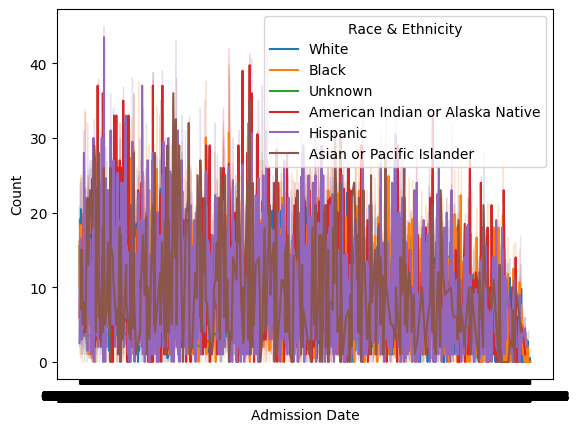

In [17]:
sns.lineplot(data = PrisonData, x = "Admission Date", y = "Count", hue="Race & Ethnicity")

Need to filter dates to the last 10 years so it is legible.

In [18]:
PrisonData["Admission Date"] = pd.to_datetime(PrisonData["Admission Date"])

In [27]:
PrisonData2020 = PrisonData[PrisonData["Admission Date"].dt.year >= 2020]
PrisonData2021 = PrisonData[PrisonData["Admission Date"].dt.year >= 2021]
PrisonData2022 = PrisonData[PrisonData["Admission Date"].dt.year >= 2022]

<AxesSubplot: xlabel='Admission Date', ylabel='Count'>

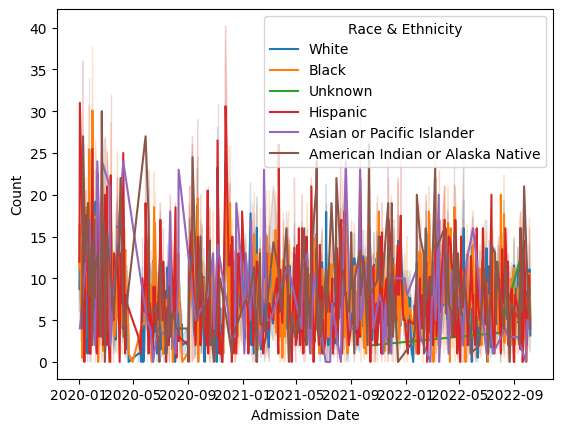

In [26]:
sns.lineplot(data = PrisonData2020, x = "Admission Date", y = "Count", hue="Race & Ethnicity")

<AxesSubplot: xlabel='Admission Date', ylabel='Count'>

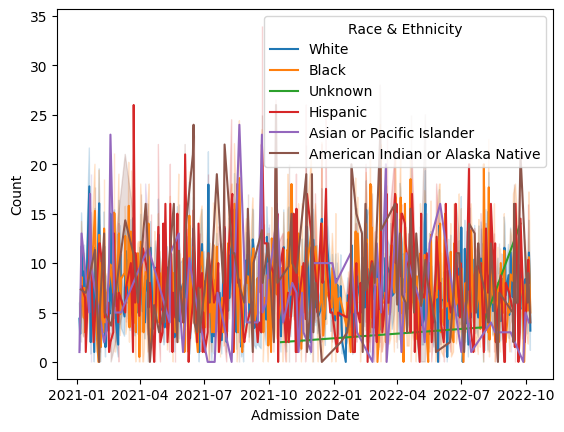

In [28]:
sns.lineplot(data = PrisonData2021, x = "Admission Date", y = "Count", hue="Race & Ethnicity")

<AxesSubplot: xlabel='Admission Date', ylabel='Count'>

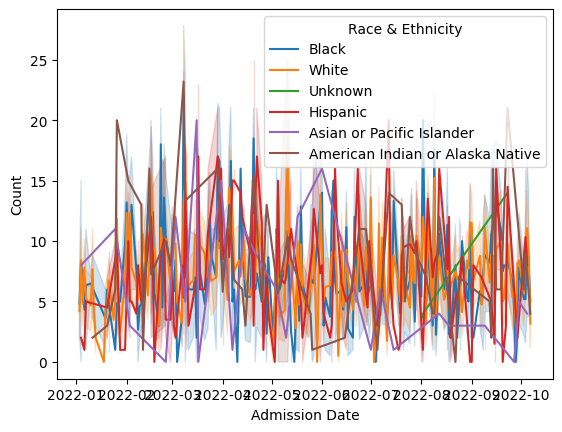

In [29]:
sns.lineplot(data = PrisonData2022, x = "Admission Date", y = "Count", hue="Race & Ethnicity")

Creating a facet grid by race to view the data a little easier.

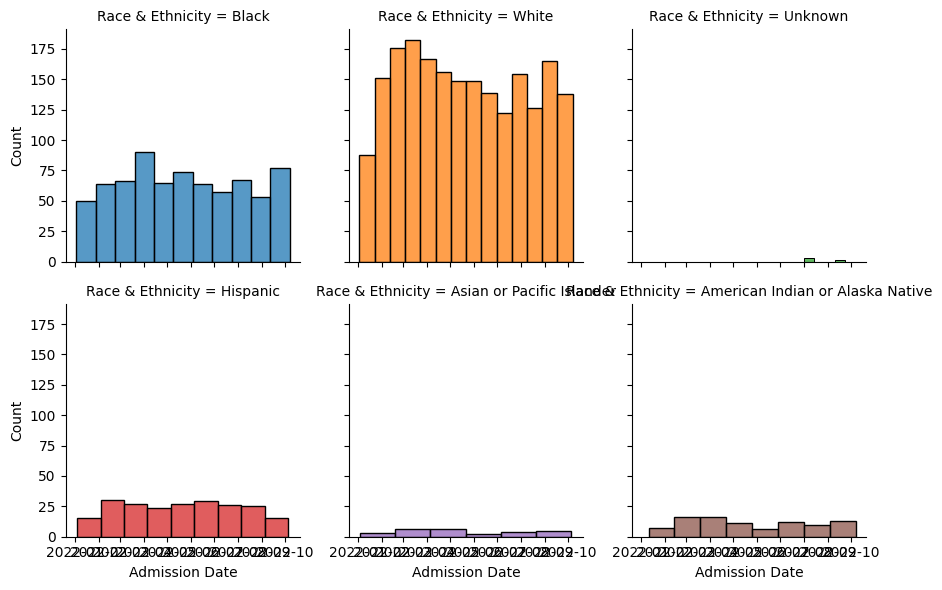

In [34]:
g = sns.FacetGrid(PrisonData2022, col = "Race & Ethnicity", col_wrap=3, hue = "Race & Ethnicity")
g.map(sns.histplot, "Admission Date")

Initial impressions appear that White is the most affected, but rate may be more telling.

In [ ]:
"""
To Do:

Import Census numbers for race and calculate rate based on race and ethnicity

Create a stacked bar chart to show how race and ethnicity compare to each other each day

"""